In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
regions_df = gpd.read_file('data/taxi_zones.shp')
regions_df = regions_df.rename(columns = {'LocationID' : 'Location'})
labels_df = pd.read_parquet('data/labels.parquet')

# Visualization

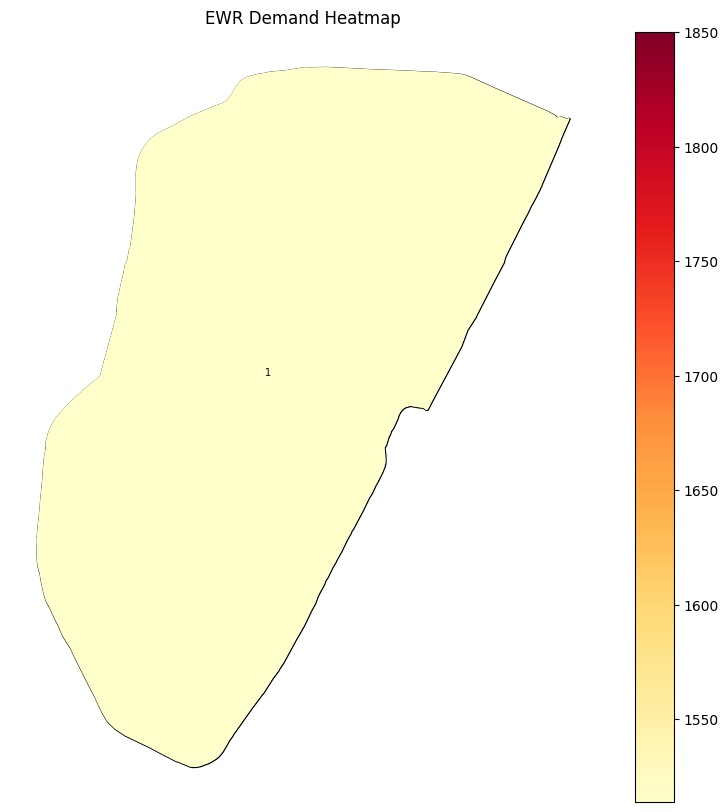

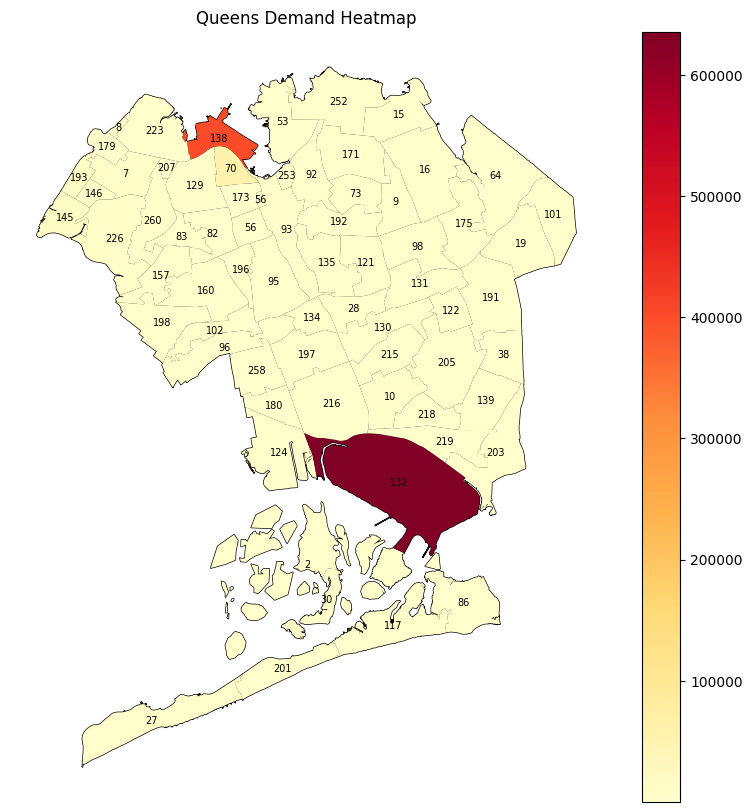

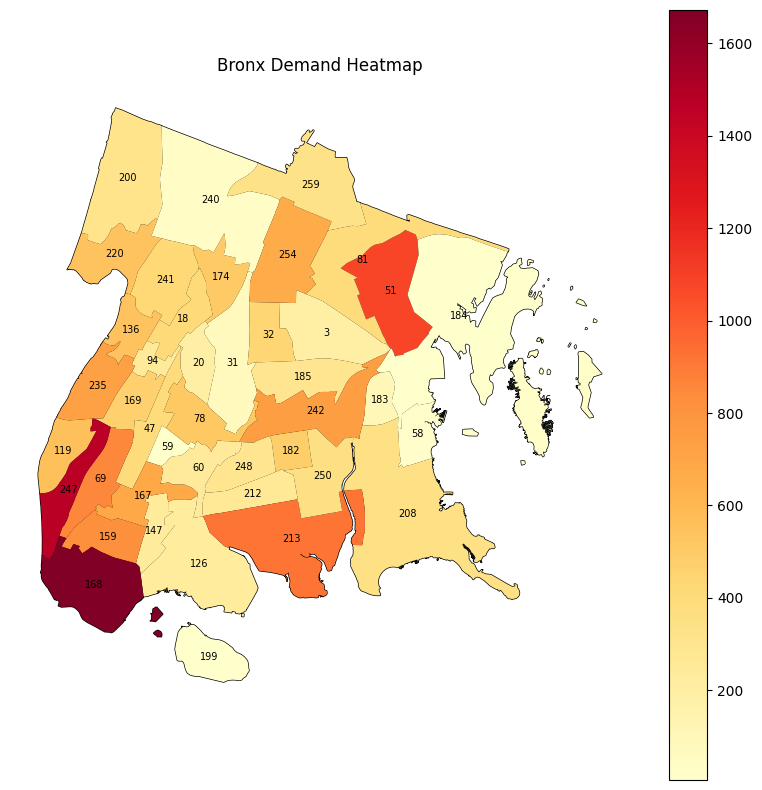

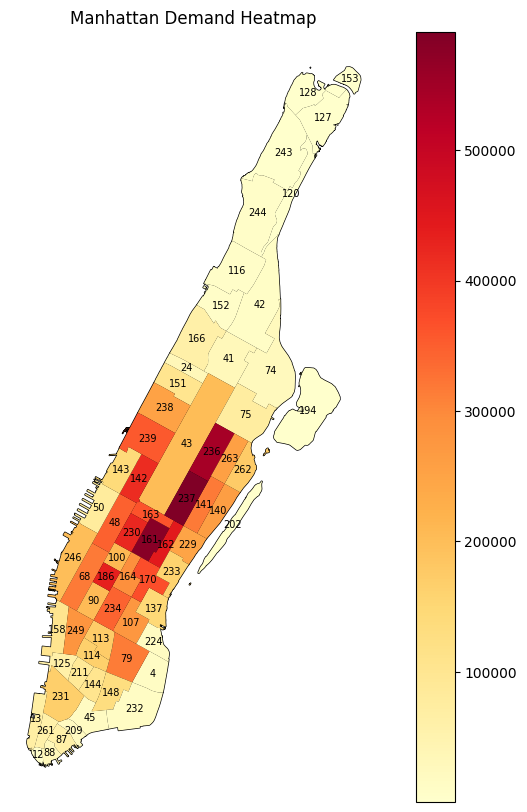

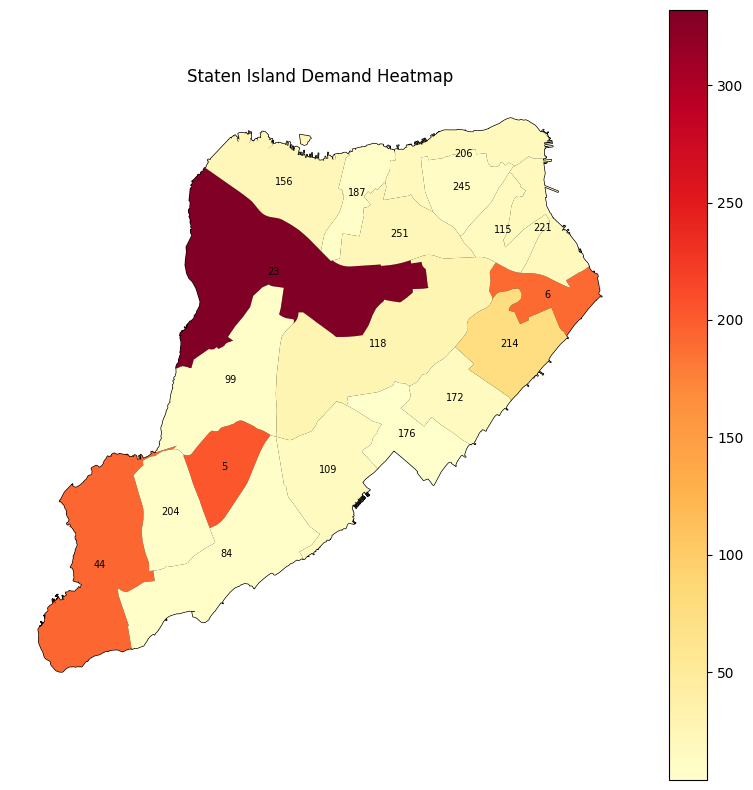

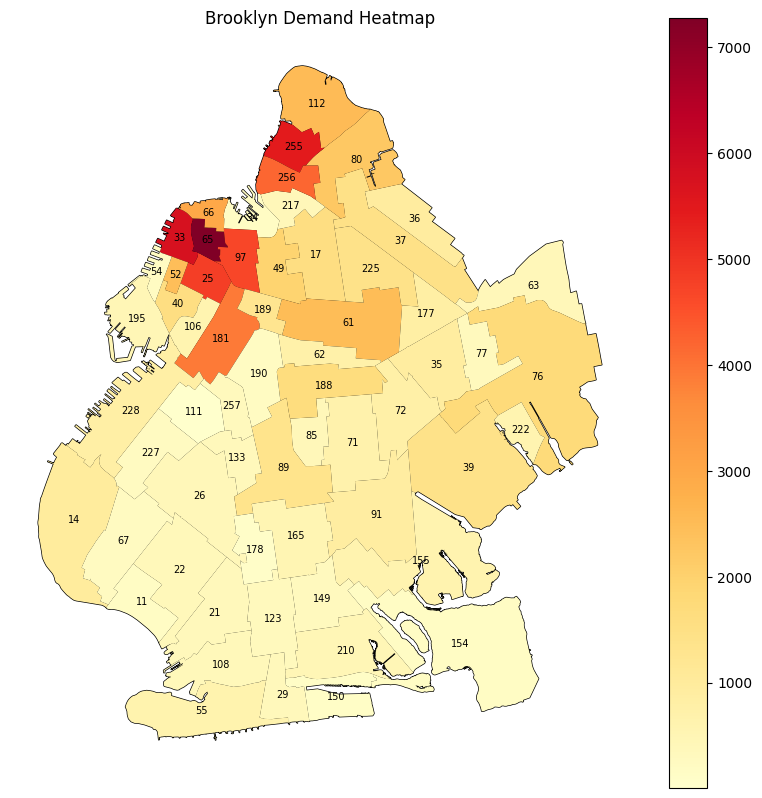

In [14]:



merged = pd.merge(regions_df, labels_df, on='Location')

agg = merged.groupby('Location')['Demand'].sum().reset_index()
map_df = regions_df.merge(agg, on='Location')

borough_dfs = {}
for borough in map_df["borough"].unique():
    borough_dfs[borough] = map_df[map_df["borough"] == borough]


for i, (borough, borough_df) in enumerate(borough_dfs.items()):

    fig, ax = plt.subplots(figsize=(10, 10))

    borough_df.plot(ax=ax, edgecolor="black", color="white")

    borough_df.plot(ax=ax, column="Demand", cmap="YlOrRd", legend=True)

    for j, row in borough_df.iterrows():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, 
                f"{row['Location']}", 
                fontsize=7,
                horizontalalignment='center', verticalalignment='center')

    ax.set_title(f"{borough} Demand Heatmap")
    ax.axis("off")

plt.show()